In [68]:
import matplotlib.pyplot as plt
import csv
import os


def kClusters(k: int, edges):
    clusteredEdges = {
        "x": edges["x"].copy(),
        "y": edges["y"].copy(),
        "distance": edges["distance"].copy(),
    }
    for _ in range(0, k - 1):
        maxDistance = max(clusteredEdges["distance"])
        maxIndex = clusteredEdges["distance"].index(maxDistance)

        del clusteredEdges["distance"][maxIndex]
        del clusteredEdges["x"][2 * maxIndex]
        del clusteredEdges["x"][2 * maxIndex]
        del clusteredEdges["y"][2 * maxIndex]
        del clusteredEdges["y"][2 * maxIndex]

    return clusteredEdges


def loadData(file: str):
    vertexData = {
        "a": [],  # x
        "b": [],  # y
        "s": [],  # radius
    }

    edgeData = {"x": [], "y": [], "distance": []}  # first vertex  # second vertex

    mstData = {"x": [], "y": [], "distance": []}  # first vertex  # second vertex

    with open(f"data/{file}/v.csv") as vertexFile:
        vreader = csv.reader(vertexFile)
        for row in vreader:
            vertexData["a"].append(float(row[0]))
            vertexData["b"].append(float(row[1]))
            vertexData["s"].append(max(float(row[2]) * 20**2, 50))

    with open(f"data/{file}/e.csv") as edgeFile:
        ereader = csv.reader(edgeFile)

        for row in ereader:
            # add v1 (source)
            edgeData["x"].append(float(row[0]))
            edgeData["y"].append(float(row[1]))
            # add v2 (destination)
            edgeData["x"].append(float(row[2]))
            edgeData["y"].append(float(row[3]))
            # add distance
            edgeData["distance"].append(float(row[4]))

    with open(f"data/{file}/mst.csv") as mstFile:
        mstreader = csv.reader(mstFile)

        for row in mstreader:
            # add v1 (source)
            mstData["x"].append(float(row[0]))
            mstData["y"].append(float(row[1]))
            # add v2 (destination)
            mstData["x"].append(float(row[2]))
            mstData["y"].append(float(row[3]))
            # add distance
            mstData["distance"].append(float(row[4]))

    return (vertexData, edgeData, mstData)


def find_connected_components(vertexData, edgeData):
    edges = []
    for i in range(0, len(edgeData["x"]), 2):
        edges.append(
            (
                (edgeData["x"][i], edgeData["y"][i]),
                (edgeData["x"][i + 1], edgeData["y"][i + 1]),
            )
        )

    vertices = []
    vertexSizes = {}

    for i in range(len(vertexData["a"])):
        vertices.append((vertexData["a"][i], vertexData["b"][i]))
        vertexSizes[(vertexData["a"][i], vertexData["b"][i])] = vertexData["s"][i]

    # We want to only iterate over the iterator once
    adj = {v: [] for v in vertices}

    for edge in edges:
        adj[edge[0]].append(edge[1])
        adj[edge[1]].append(edge[0])

    visited = set()

    def dfs(v, component):
        visited.add(v)
        component.add(v)

        for n in adj[v]:
            if n not in visited:
                dfs(n, component)

    components = []

    for v in adj.keys():
        if v not in visited:
            component = set()
            dfs(v, component)
            components.append(list(component))

    componentData = []
    for component in components:
        newCData = {"x": [], "y": [], "s": []}
        for item in component:
            newCData["x"].append(item[0])
            newCData["y"].append(item[1])
            newCData["s"].append(vertexSizes[(item[0], item[1])])
        componentData.append(newCData)
    return componentData

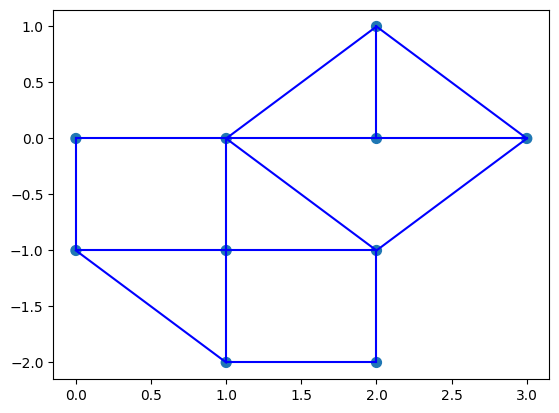

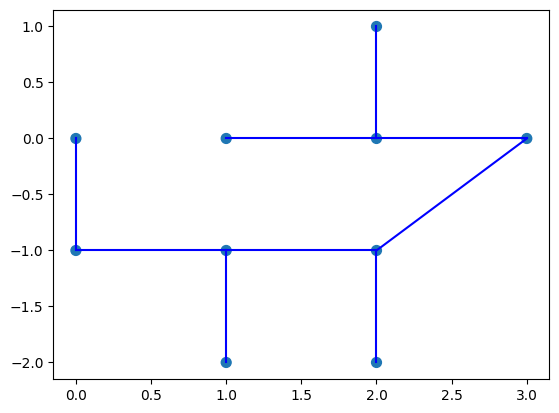

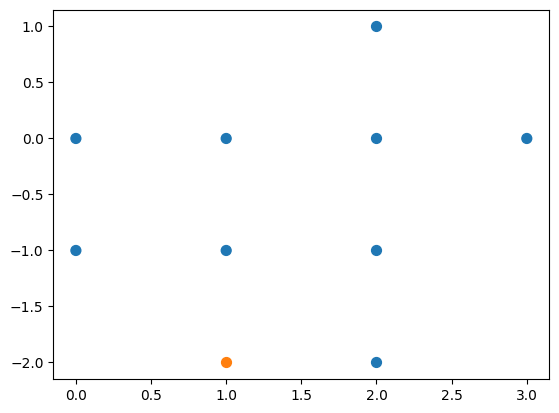

In [69]:
(vertices, edges, mst) = loadData("material")

clustered = kClusters(2, mst)
clusterComponents = find_connected_components(vertices, clustered)

os.mkdir("images/material")
plt.scatter("a", "b", "s", data=vertices)
for i in range(0, len(edges["x"]), 2):
    plt.plot(
        [edges["x"][i], edges["x"][i + 1]],
        [edges["y"][i], edges["y"][i + 1]],
        color="blue",
    )

plt.savefig("images/material/allEdges")
plt.show()

plt.scatter("a", "b", "s", data=vertices)
for i in range(0, len(mst["x"]), 2):
    plt.plot(
        [mst["x"][i], mst["x"][i + 1]], [mst["y"][i], mst["y"][i + 1]], color="blue"
    )

plt.savefig("images/material/mst")
plt.show()

for cluster in clusterComponents:
    plt.scatter("x", "y", "s", data=cluster)

plt.savefig("images/material/cluster")
plt.show()

In [71]:
# Visualize graph with all noises
def visualize(dataName: str, clusters=2):
    # Load in data
    (vertices, edges, mst) = loadData(dataName)

    os.mkdir(f"images/{dataName}")

    # Scatter for vertices only
    plt.scatter("a", "b", "s", data=vertices)

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])
    plt.savefig(f"images/{dataName}/vertices")
    plt.show()

    plt.scatter("a", "b", "s", data=vertices)

    for i in range(0, len(edges["x"]), 2):
        plt.plot(
            [edges["x"][i], edges["x"][i + 1]],
            [edges["y"][i], edges["y"][i + 1]],
            linewidth=0.002,
        )

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])

    plt.savefig(f"images/{dataName}/allEdges")
    plt.show()

    plt.scatter("a", "b", "s", data=vertices)
    for i in range(0, len(mst["x"]), 2):
        plt.plot(
            [mst["x"][i], mst["x"][i + 1]],
            [mst["y"][i], mst["y"][i + 1]],
            linewidth=0.5,
        )

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])

    plt.savefig(f"images/{dataName}/mst")
    plt.show()

    clustered = kClusters(clusters, mst)
    clusterComponents = find_connected_components(vertices, clustered)

    for cluster in clusterComponents:
        plt.scatter("x", "y", "s", data=cluster)

    frame1 = plt.gca()
    frame1.axes.xaxis.set_ticks([])
    frame1.axes.yaxis.set_ticks([])

    plt.savefig(f"images/{dataName}/cluster")
    plt.show()

blobs 150 vertices low noise


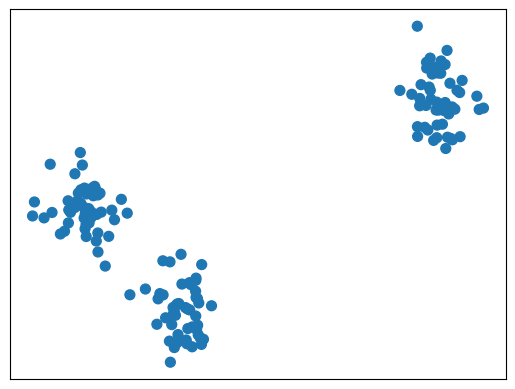

In [77]:
print("blobs 150 vertices low noise")
visualize("blobs-150-low", 3)

print("blobs 150 vertices medium noise")
visualize("blobs-150-medium", 6)

print("blobs 150 vertices high noise")
visualize("blobs-150-high", 10)

circles 150 vertices low noise


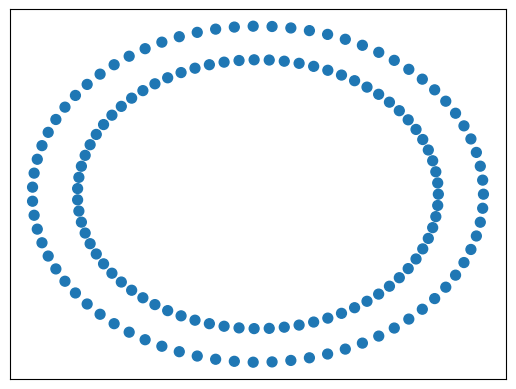

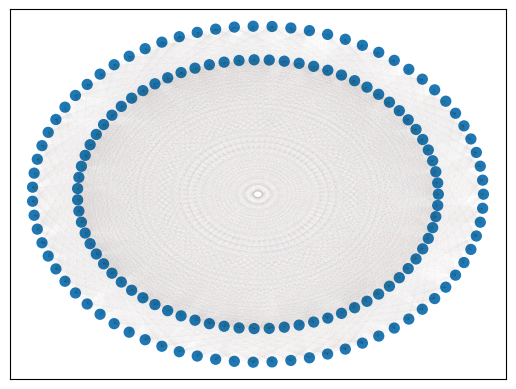

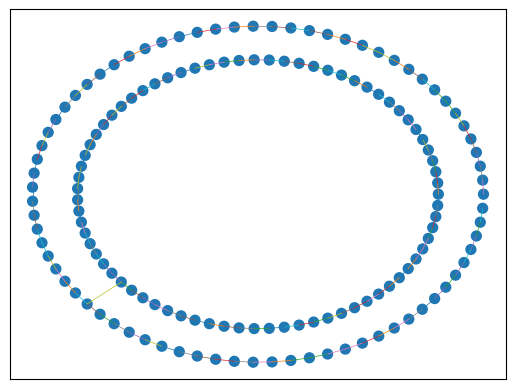

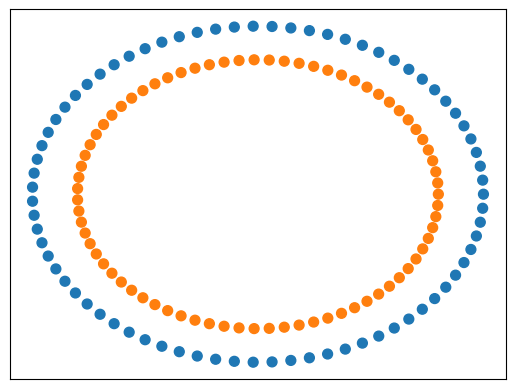

circles 150 vertices medium noise


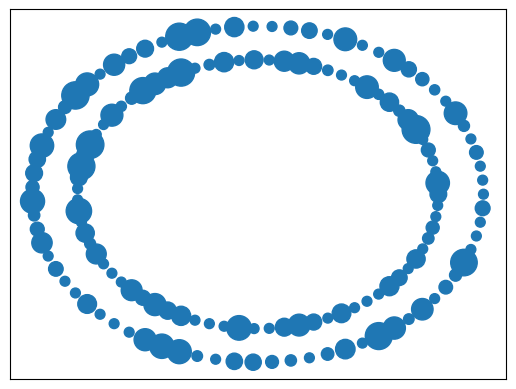

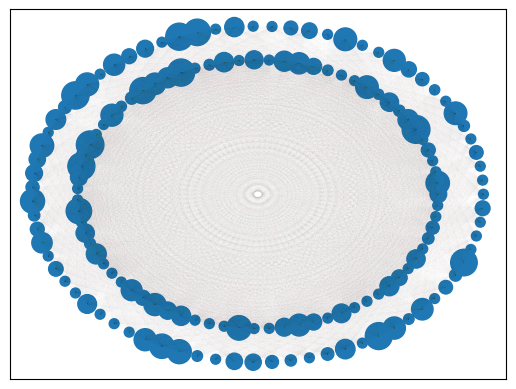

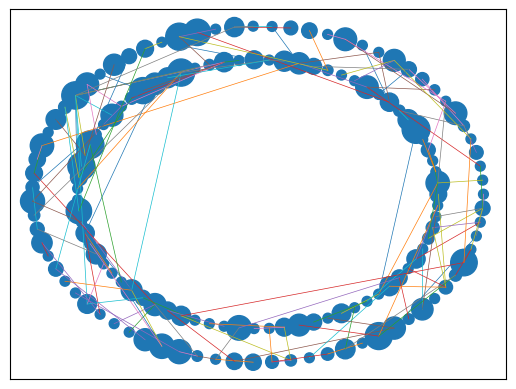

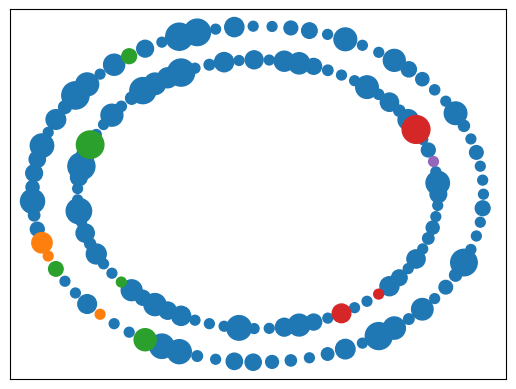

circles 150 vertices high noise


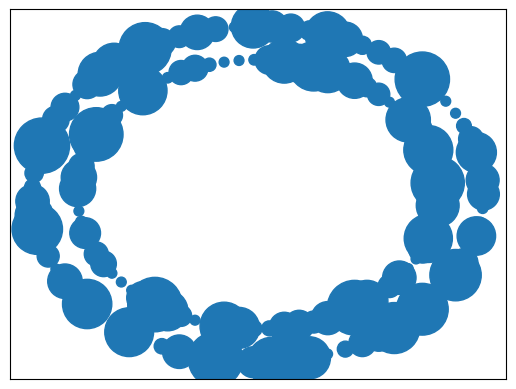

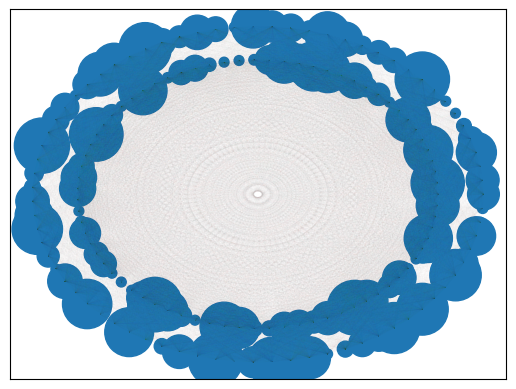

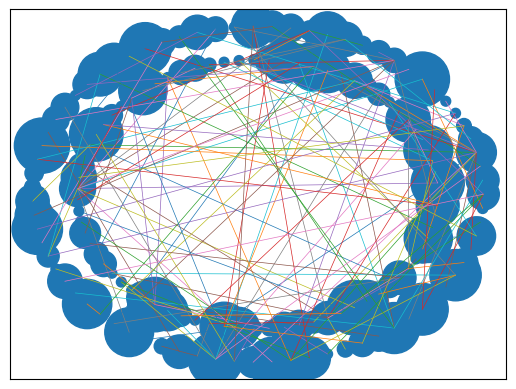

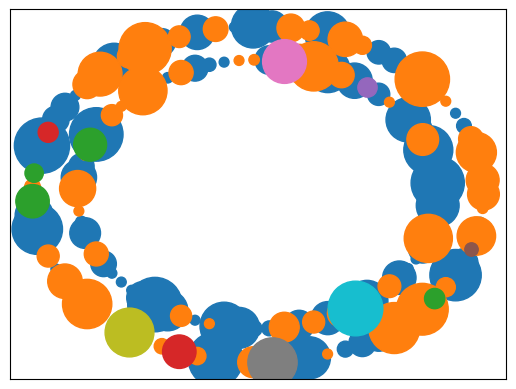

In [75]:
print("circles 150 vertices low noise")
visualize("circles-150-low", 2)

print("circles 150 vertices medium noise")
visualize("circles-150-medium", 6)

print("circles 150 vertices high noise")
visualize("circles-150-high", 10)

moons 150 vertices low noise


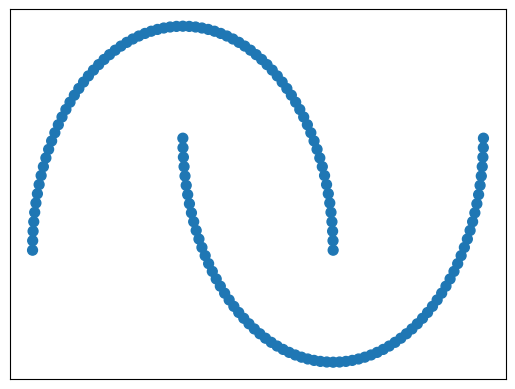

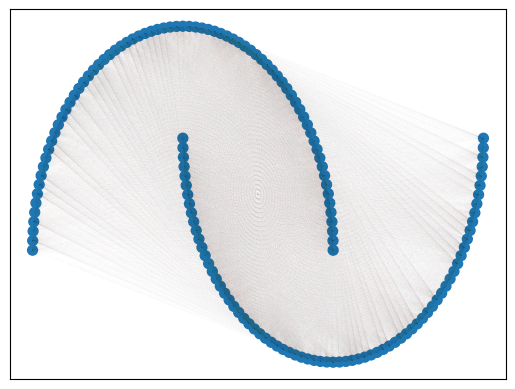

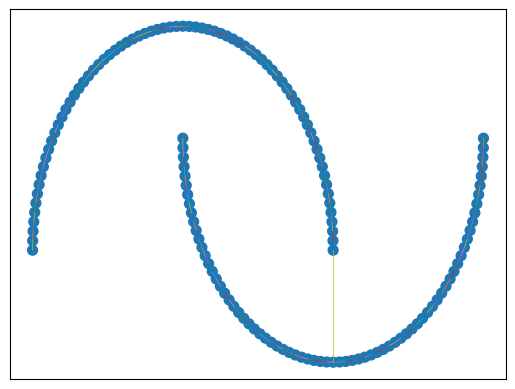

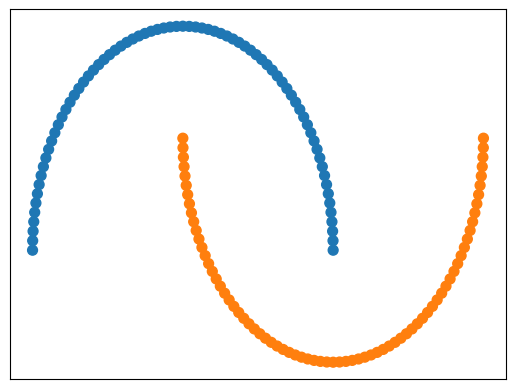

moons 150 vertices medium noise


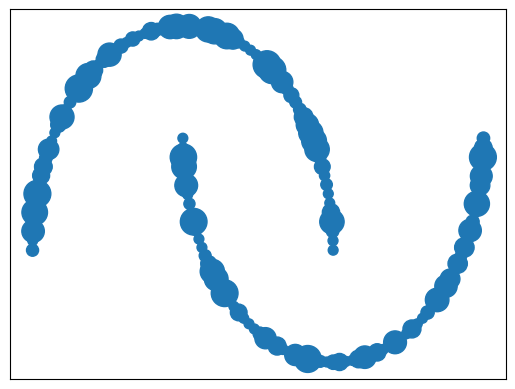

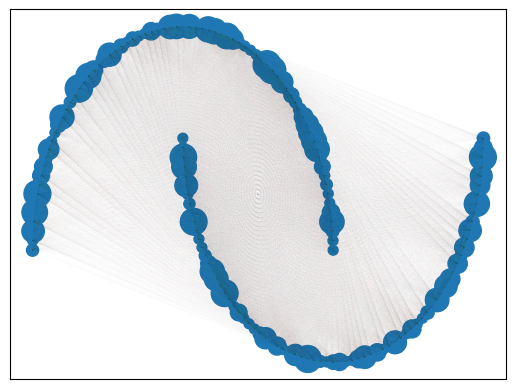

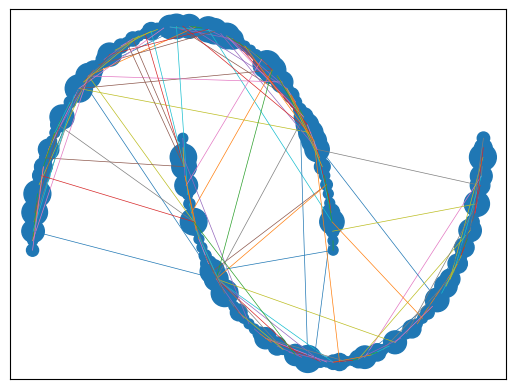

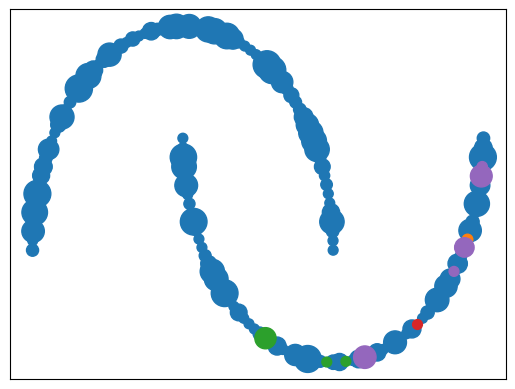

moons 150 vertices high noise


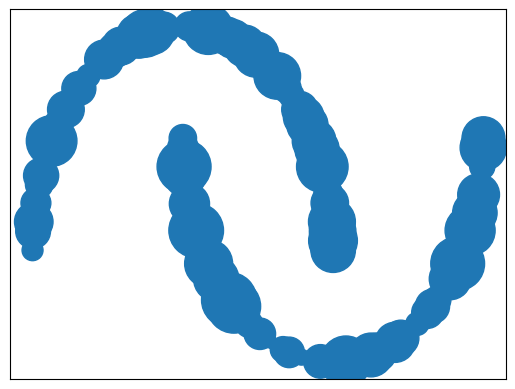

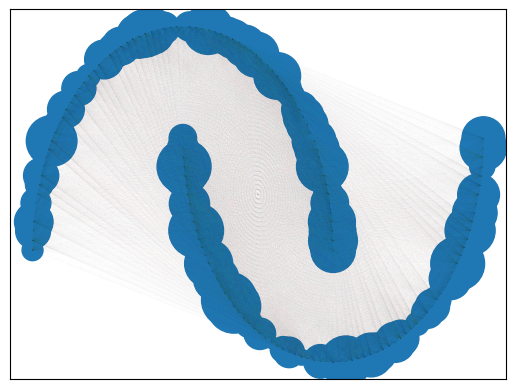

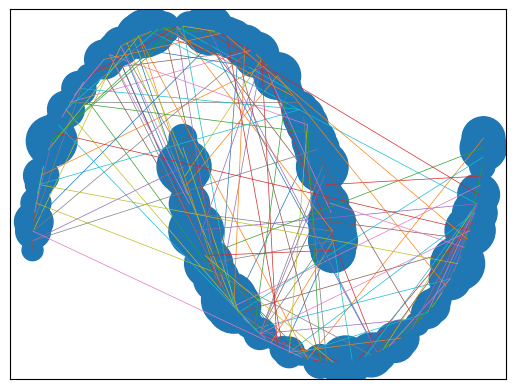

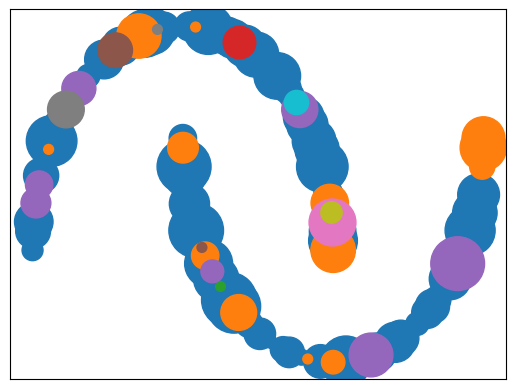

In [76]:
print("moons 150 vertices low noise")
visualize("moons-150-low", 2)

print("moons 150 vertices medium noise")
visualize("moons-150-medium", 6)

print("moons 150 vertices high noise")
visualize("moons-150-high", 10)